In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.DataFrame()
for i in range(1,6):
    df_temp = pd.read_csv(f"Raw_Data/Creditcard_{i}.csv")
    df = pd.concat([df,df_temp], ignore_index=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287206,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
287207,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
287208,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
287209,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


In [21]:
df_fraud = df[df["Class"]==1]
df_legit = df[df["Class"]==0]

split_index = int(0.5*len(df_fraud))
df_fraud_train = df_fraud.iloc[:split_index]
df_fraud_test = df_fraud.iloc[split_index:]

split_index = int(0.5*len(df_legit))
df_legit_train = df_legit.iloc[:split_index]
df_legit_test = df_legit.iloc[split_index:]

df_train = pd.concat([df_fraud_train,df_legit_train], ignore_index=True)
df_test = pd.concat([df_fraud_test,df_legit_test], ignore_index=True)

df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = df_train.iloc[:,:-1]
X_train = sc.fit_transform(X_train)
y_train = df_train.iloc[:,-1]

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
X_train = X_resampled
y_train = y_resampled

In [23]:
X_test = df_test.iloc[:, :-1]
X_test = sc.transform(X_test)
y_test = df_test.iloc[:, -1]

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred_LG = LG.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_LG))
print(recall_score(y_test, y_pred_LG))

[[118472  23686]
 [    23    223]]
0.9065040650406504


## Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred_RF = RF.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_RF))
print(recall_score(y_test, y_pred_RF))

[[142158      0]
 [   246      0]]
0.0


## XGBoost Classifier

In [28]:
import xgboost as xgb

XGBoost = xgb.XGBClassifier()
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
y_pred_XGB = XGBoost.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_XGB))
print(recall_score(y_test, y_pred_XGB))

[[142139     19]
 [   137    109]]
0.44308943089430897


## Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred_DTC = DTC_model.predict(X_test)
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_DTC))
print(recall_score(y_test, y_pred_DTC))

[[141751    407]
 [   246      0]]
0.0


## Artificial Neural Network

In [32]:
import tensorflow as tf
import keras as ks

#Initializing the ANN
ann = tf.keras.models.Sequential()

#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [33]:
#Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#Training the ANN on the training set
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.2288
Epoch 2/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0309
Epoch 3/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0207
Epoch 4/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0159
Epoch 5/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0125
Epoch 6/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0098
Epoch 7/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0096
Epoch 8/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0081
Epoch 9/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0085
Epoch 10/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0081


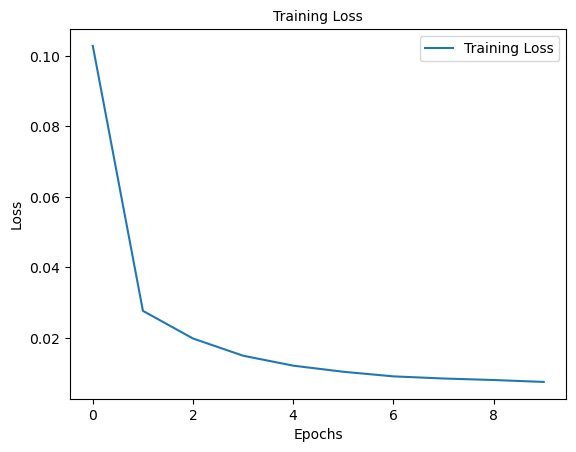

In [34]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Training Loss', fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [35]:
y_proba = ann.predict(X_test)

# Convert to 0 or 1 using threshold
y_pred_ANN = (y_proba >= 0.5).astype(int).flatten()
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(y_test, y_pred_ANN))
print(recall_score(y_test, y_pred_ANN))

4451/4451 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
[[142106     52]
 [    70    176]]
0.7154471544715447


## ROC Curve

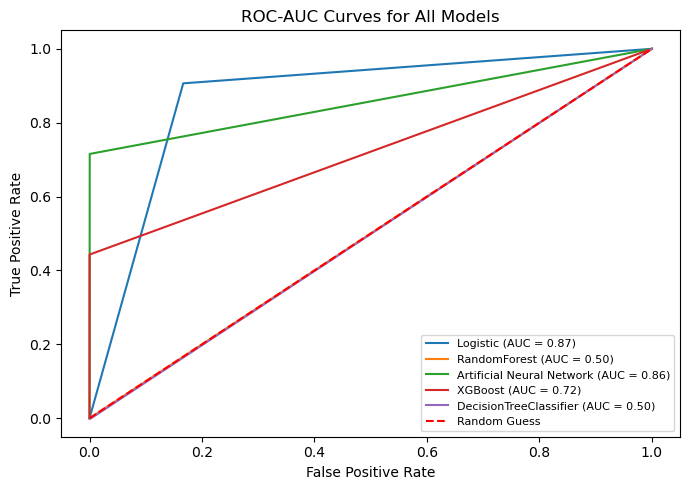

In [38]:
from sklearn.metrics import roc_curve, auc

test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_LG, 'RandomForest': y_pred_RF, 'Artificial Neural Network': y_pred_ANN, 'XGBoost': y_pred_XGB, 'DecisionTreeClassifier': y_pred_DTC})

plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'Artificial Neural Network', 'XGBoost', 'DecisionTreeClassifier']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.yticks(fontsize=10)
plt.title('ROC-AUC Curves for All Models', fontsize=12)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("ROC-AUC curve for Raw Data.png")
plt.show()
